In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score


In [2]:
import warnings
warnings.filterwarnings("ignore")

https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star

Attribute Information:
Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency . The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class

In [3]:
feature_dict = {i:label for i,label in zip(
                range(9),
                  ('Mean of the integrated profile.', 
                  "Standard deviation of the integrated profile.", 
                  'Excess kurtosis of the integrated profile.',
                   'Skewness of the integrated profile.',
                   'Mean of the DM-SNR curve.',
                   'Standard deviation of the DM-SNR curve.',
                   'Excess kurtosis of the DM-SNR curve.',
                   'Skewness of the DM-SNR curve.'                   
                   ))}
feature_dict

{0: 'Mean of the integrated profile.',
 1: 'Standard deviation of the integrated profile.',
 2: 'Excess kurtosis of the integrated profile.',
 3: 'Skewness of the integrated profile.',
 4: 'Mean of the DM-SNR curve.',
 5: 'Standard deviation of the DM-SNR curve.',
 6: 'Excess kurtosis of the DM-SNR curve.',
 7: 'Skewness of the DM-SNR curve.'}

In [4]:
#download data
df = pd.read_csv(
    'pulsar_stars.csv', 
    header=0, 
    sep=',', 
    )
df.columns = [l for i,l in sorted(feature_dict.items())] + ['class label']
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

df.tail()

Mean of the integrated profile.  \
17893                       136.429688   
17894                       122.554688   
17895                       119.335938   
17896                       114.507812   
17897                        57.062500   

       Standard deviation of the integrated profile.  \
17893                                      59.847421   
17894                                      49.485605   
17895                                      59.935939   
17896                                      53.902400   
17897                                      85.797340   

       Excess kurtosis of the integrated profile.  \
17893                                   -0.187846   
17894                                    0.127978   
17895                                    0.159363   
17896                                    0.201161   
17897                                    1.406391   

       Skewness of the integrated profile.  Mean of the DM-SNR curve.  \
17893                            -0.738123                   1.296823   
17894                             0.323061                  16.409699   
17895                            -0.743025                  21.430602   
17896                            -0.024789                   1.946488   
17897                             0.089520                 188.306020   

       Standard deviation of the DM-SNR curve.  \
17893                                12.166062   
17894                                44.626893   
17895                                58.872000   
17896                                13.381731   
17897                                64.712562   

       Excess kurtosis of the DM-SNR curve.  Skewness of the DM-SNR curve.  \
17893                             15.450260                     285.931022   
17894                              2.945244                       8.297092   
17895                              2.499517                       4.595173   
17896                             10.007967                     134.238910   
17897                             -1.597527                       1.429475   

       class label  
17893            0  
17894            0  
17895            0  
17896            0  
17897            0

In [5]:
line,row =df.shape
print("the dataset has", line, "lines and", row,"rows")

the dataset has 17898 lines and 9 rows


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17898 entries, 0 to 17897
Data columns (total 9 columns):
Mean of the integrated profile.                  17898 non-null float64
Standard deviation of the integrated profile.    17898 non-null float64
Excess kurtosis of the integrated profile.       17898 non-null float64
Skewness of the integrated profile.              17898 non-null float64
Mean of the DM-SNR curve.                        17898 non-null float64
Standard deviation of the DM-SNR curve.          17898 non-null float64
Excess kurtosis of the DM-SNR curve.             17898 non-null float64
Skewness of the DM-SNR curve.                    17898 non-null float64
class label                                      17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.4 MB


In [7]:
#check for missing values
print (df.isnull().sum())

Mean of the integrated profile.                  0
Standard deviation of the integrated profile.    0
Excess kurtosis of the integrated profile.       0
Skewness of the integrated profile.              0
Mean of the DM-SNR curve.                        0
Standard deviation of the DM-SNR curve.          0
Excess kurtosis of the DM-SNR curve.             0
Skewness of the DM-SNR curve.                    0
class label                                      0
dtype: int64


In [8]:
df.describe()

Mean of the integrated profile.  \
count                     17898.000000   
mean                        111.079968   
std                          25.652935   
min                           5.812500   
25%                         100.929688   
50%                         115.078125   
75%                         127.085938   
max                         192.617188   

       Standard deviation of the integrated profile.  \
count                                   17898.000000   
mean                                       46.549532   
std                                         6.843189   
min                                        24.772042   
25%                                        42.376018   
50%                                        46.947479   
75%                                        51.023202   
max                                        98.778911   

       Excess kurtosis of the integrated profile.  \
count                                17898.000000   
mean                                     0.477857   
std                                      1.064040   
min                                     -1.876011   
25%                                      0.027098   
50%                                      0.223240   
75%                                      0.473325   
max                                      8.069522   

       Skewness of the integrated profile.  Mean of the DM-SNR curve.  \
count                         17898.000000               17898.000000   
mean                              1.770279                  12.614400   
std                               6.167913                  29.472897   
min                              -1.791886                   0.213211   
25%                              -0.188572                   1.923077   
50%                               0.198710                   2.801839   
75%                               0.927783                   5.464256   
max                              68.101622                 223.392140   

       Standard deviation of the DM-SNR curve.  \
count                             17898.000000   
mean                                 26.326515   
std                                  19.470572   
min                                   7.370432   
25%                                  14.437332   
50%                                  18.461316   
75%                                  28.428104   
max                                 110.642211   

       Excess kurtosis of the DM-SNR curve.  Skewness of the DM-SNR curve.  \
count                          17898.000000                   17898.000000   
mean                               8.303556                     104.857709   
std                                4.506092                     106.514540   
min                               -3.139270                      -1.976976   
25%                                5.781506                      34.960504   
50%                                8.433515                      83.064556   
75%                               10.702959                     139.309331   
max                               34.539844                    1191.000837   

        class label  
count  17898.000000  
mean       0.091574  
std        0.288432  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

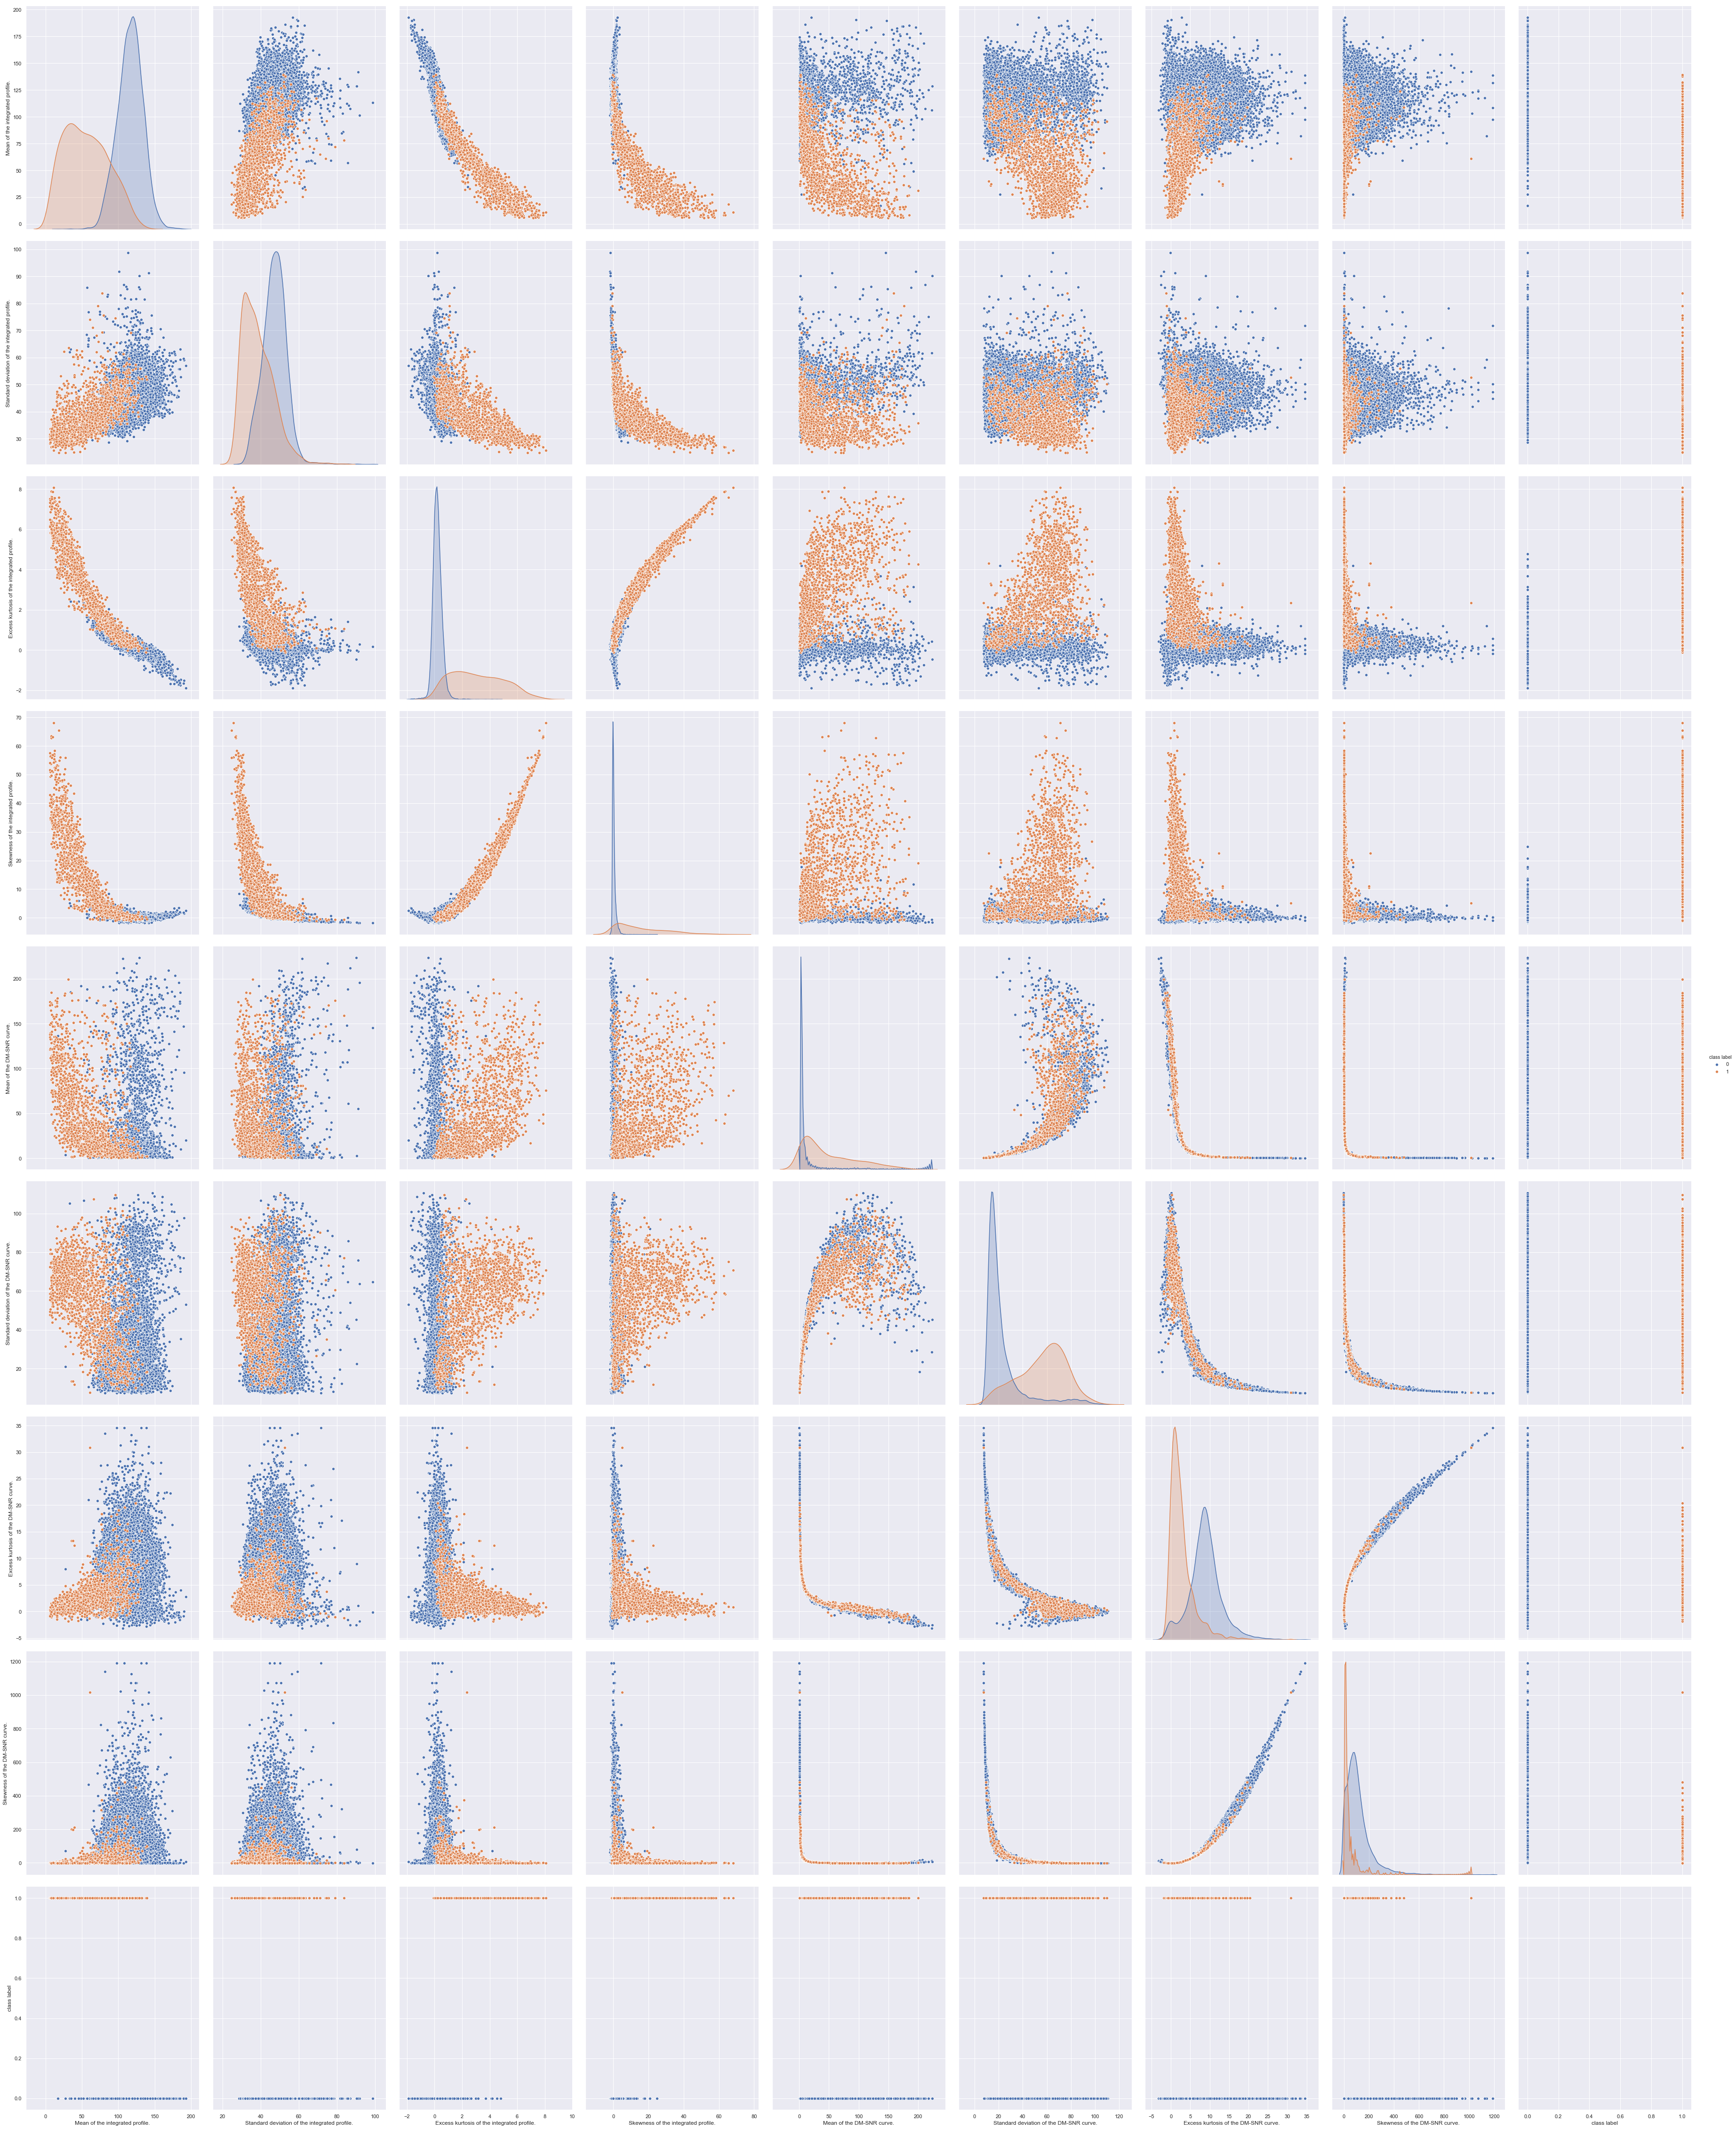

In [9]:
sns.set()
sns.pairplot(df, hue="class label", height=7, aspect=0.8)

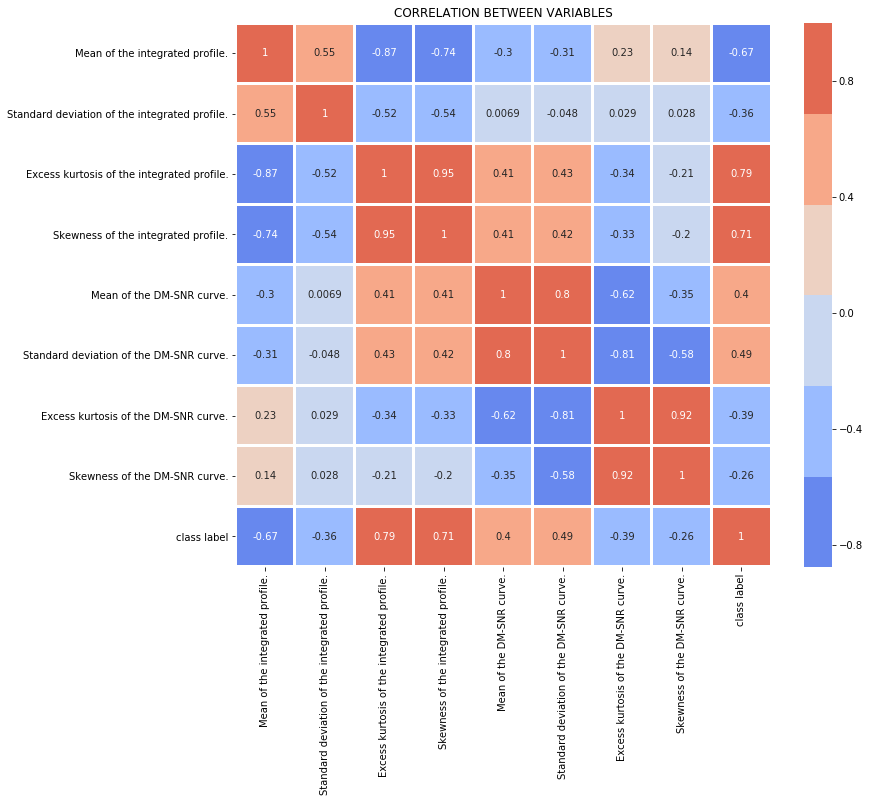

In [9]:
correlation = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation,annot=True,
            cmap=sns.color_palette("coolwarm"),
            linewidth=2,edgecolor="k")
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()

In [10]:
label_dict = {1: 'Star', 2: 'Not a star'}

Text(0.5,1,'Class label in dataset')

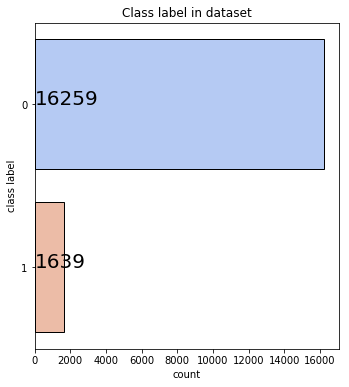

In [11]:
plt.figure(figsize=(12,6))
plt.subplot(121)
ax = sns.countplot(y = df["class label"],
                   palette=('coolwarm'),
                   linewidth=1,
                   edgecolor="k")
for i,j in enumerate(df["class label"].value_counts().values):
    ax.text(.7,i,j,fontsize = 20)
plt.title("Class label in dataset")

#### Data Preprocessing

In [12]:
from sklearn.model_selection import train_test_split

train , test = train_test_split(df,test_size = .3,random_state = 42)

#Seperating Predictor and target variables
X_train = train[[x for x in train.columns if x not in ["class label"]]]
y_train = train[["class label"]]
X_test  = test[[x for x in test.columns if x not in ["class label"]]]
y_test  = test[["class label"]]

In [80]:
df=pd.DataFrame()
df2=pd.DataFrame()
print(df)
print(df2)

Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []


In [79]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc, precision_score

def model(algorithm,dtrain_x,dtrain_y,dtest_x,dtest_y,of_type, df):
    
    print ("*****************************************************************************************")
    print ("MODEL - OUTPUT")
    print ("*****************************************************************************************")
    algorithm.fit(dtrain_x,dtrain_y)
    predictions = algorithm.predict(dtest_x)
    
    print (algorithm)
    print ("\naccuracy_score :",accuracy_score(dtest_y,predictions))
    
    print ("\nclassification report :\n",(classification_report(dtest_y,predictions,  digits=3)))
      
       
    plt.figure(figsize=(13,10))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(dtest_y,predictions),annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title("CONFUSION MATRIX",fontsize=20)
    
    predicting_probabilites = algorithm.predict_proba(dtest_x)[:,1]
    fpr,tpr,thresholds = roc_curve(dtest_y,predicting_probabilites)
    plt.subplot(222)
    plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
    plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
    plt.legend(loc = "best")
    plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)
    
    df2=pd.DataFrame([[type(algorithm).__name__,
                       round(accuracy_score(dtest_y,predictions),3),
                       round(auc(fpr,tpr),3),
                       round(precision_score(dtest_y,predictions),3)]],
                     columns= ("Model name",'Accuracy','AUC','Precision'))
    df=df.append(df2)
    print(df)
    
    
    
    if  of_type == "feat":
        
        
        dataframe = pd.DataFrame(algorithm.feature_importances_,dtrain_x.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(223)
        ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("FEATURE IMPORTANCES",fontsize =20)
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(.011,i,j,weight = "bold")
        return(df)
    
    elif of_type == "coef" :
        
        
        dataframe = pd.DataFrame(algorithm.coef_.ravel(),dtrain_x.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(223)
        ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("FEATURE IMPORTANCES",fontsize =20)
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(.011,i,j,weight = "bold")
        return(df)
            
    elif of_type == "none" :
        return(df)
    
#    return(df)
    
    

## LDA

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
LinearDiscriminantAnalysis(n_components=3, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

accuracy_score : 0.9733705772811918

classification report :
              precision    recall  f1-score   support

          0      0.976     0.995     0.986      4884
          1      0.943     0.751     0.836       486

avg / total      0.973     0.973     0.972      5370

                   Model name  Accuracy    AUC  Precision
0  LinearDiscriminantAnalysis     0.973  0.975      0.943


Model name  Accuracy    AUC  Precision
0  LinearDiscriminantAnalysis     0.973  0.975      0.943

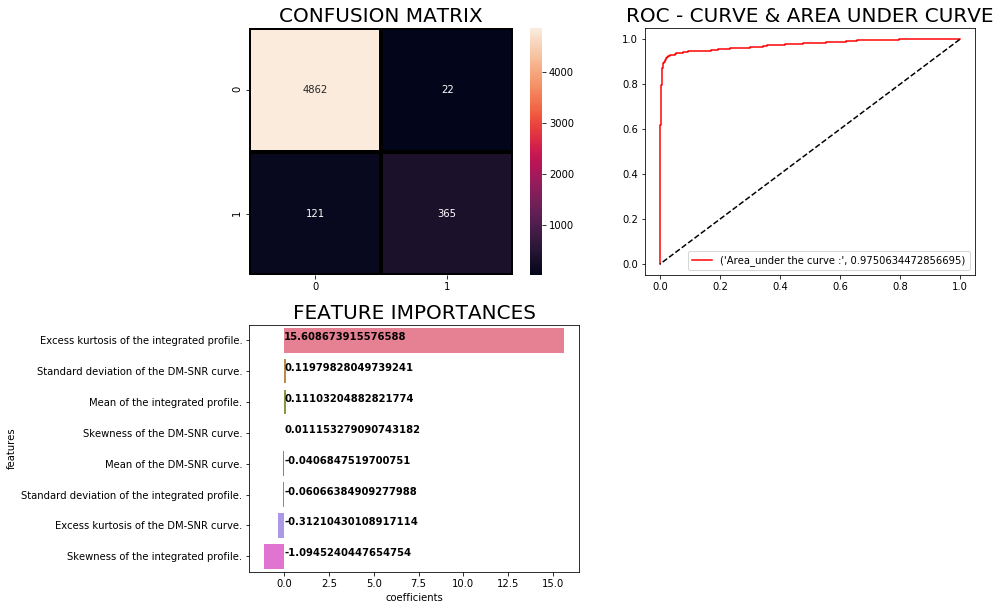

In [81]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=3)
df2=df2.append(model(lda,X_train, y_train, X_test, y_test,"coef",df))
df2

## Manually

In [16]:
X = df.iloc[:, 0:8].values  
y = df.iloc[:, 8].values  
X.shape

(17898, 8)

Computing the d-dimensional mean vectors

In [17]:
np.set_printoptions(precision=4)

mean_vectors = []
mean_vectors.append(np.mean(X[y==0], axis=0))
print('Mean Vector class %s: %s\n' %(0, mean_vectors[0]))
mean_vectors.append(np.mean(X[y==1], axis=0))
print('Mean Vector class %s: %s\n' %(1, mean_vectors[1]))

Mean Vector class 0: [116.5627  47.3397   0.2104   0.3808   8.8633  23.288    8.8627 113.6203]

Mean Vector class 1: [56.6906 38.7106  3.1307 15.5536 49.826  56.469   2.7571 17.9317]



Computing the Scatter Matrices

 Within-class scatter matrix $S_W$

In [18]:
S_W = np.zeros((8,8))
for cl,mv in zip(range(1,8), mean_vectors):
    class_sc_mat = np.zeros((8,8))                  # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(8,1), mv.reshape(8,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[ 7350232.5998  1072906.9339  -372328.2705 -2062661.8386 -5225621.0838
  -3676060.0926   682311.5334 10278064.5655]
 [ 1072906.9339   227758.1974   -58523.1948  -350734.7755  -605724.5127
   -501935.2731    93916.5582  1478473.869 ]
 [ -372328.2705   -58523.1948    19722.291    114179.0903   264374.2145
    184656.9973   -34076.9918  -509937.5087]
 [-2062661.8386  -350734.7755   114179.0903   698236.7358  1452830.0397
    984799.6823  -181896.4982 -2700032.178 ]
 [-5225621.0838  -605724.5127   264374.2145  1452830.0397  6109685.8281
   3255184.3062  -571901.5694 -7765122.1844]
 [-3676060.0926  -501935.2731   184656.9973   984799.6823  3255184.3062
   2442200.7109  -418408.5862 -6188566.0445]
 [  682311.5334    93916.5582   -34076.9918  -181896.4982  -571901.5694
   -418408.5862    76900.9325  1181231.9296]
 [10278064.5655  1478473.869   -509937.5087 -2700032.178  -7765122.1844
  -6188566.0445  1181231.9296 19250317.5935]]


Between-class scatter matrix $S_B$

In [19]:
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((8,8))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(8,1) # make column vector
    overall_mean = overall_mean.reshape(8,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    
print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[ 4.9269e+04  7.1010e+03 -2.4031e+03 -1.2486e+04 -3.3709e+04 -2.7305e+04
   5.0244e+03  7.8743e+04]
 [ 7.1010e+03  1.0234e+03 -3.4635e+02 -1.7995e+03 -4.8583e+03 -3.9354e+03
   7.2414e+02  1.1349e+04]
 [-2.4031e+03 -3.4635e+02  1.1721e+02  6.0898e+02  1.6441e+03  1.3318e+03
  -2.4506e+02 -3.8406e+03]
 [-1.2486e+04 -1.7995e+03  6.0898e+02  3.1641e+03  8.5424e+03  6.9196e+03
  -1.2733e+03 -1.9955e+04]
 [-3.3709e+04 -4.8583e+03  1.6441e+03  8.5424e+03  2.3062e+04  1.8681e+04
  -3.4375e+03 -5.3874e+04]
 [-2.7305e+04 -3.9354e+03  1.3318e+03  6.9196e+03  1.8681e+04  1.5132e+04
  -2.7845e+03 -4.3639e+04]
 [ 5.0244e+03  7.2414e+02 -2.4506e+02 -1.2733e+03 -3.4375e+03 -2.7845e+03
   5.1237e+02  8.0300e+03]
 [ 7.8743e+04  1.1349e+04 -3.8406e+03 -1.9955e+04 -5.3874e+04 -4.3639e+04
   8.0300e+03  1.2585e+05]]


Solving the generalized eigenvalue problem for the matrix  $S_{W}^{-1}S_B$

In [20]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(8,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[ 0.0742]
 [ 0.066 ]
 [-0.9467]
 [ 0.2276]
 [ 0.0176]
 [-0.0596]
 [-0.1944]
 [ 0.0206]]
Eigenvalue 1: 7.42e-03

Eigenvector 2: 
[[-0.0663]
 [-0.049 ]
 [ 0.1514]
 [-0.7461]
 [-0.03  ]
 [ 0.0653]
 [-0.6389]
 [-0.0172]]
Eigenvalue 2: 3.09e-16

Eigenvector 3: 
[[-0.0419]
 [-0.0011]
 [-0.9898]
 [ 0.0835]
 [-0.0035]
 [ 0.0133]
 [ 0.1069]
 [ 0.0057]]
Eigenvalue 3: -2.50e-16

Eigenvector 4: 
[[-0.0182]
 [-0.006 ]
 [-0.9729]
 [ 0.0763]
 [-0.0049]
 [ 0.0014]
 [-0.2173]
 [ 0.0066]]
Eigenvalue 4: -1.94e-16

Eigenvector 5: 
[[-0.0124]
 [-0.0258]
 [-0.972 ]
 [-0.0224]
 [-0.0207]
 [ 0.0711]
 [ 0.1298]
 [-0.0156]]
Eigenvalue 5: 5.89e-18

Eigenvector 6: 
[[-0.0124]
 [-0.0258]
 [-0.972 ]
 [-0.0224]
 [-0.0207]
 [ 0.0711]
 [ 0.1298]
 [-0.0156]]
Eigenvalue 6: 5.89e-18

Eigenvector 7: 
[[-0.0151]
 [-0.1559]
 [ 0.8311]
 [ 0.2184]
 [-0.0577]
 [ 0.0526]
 [ 0.4782]
 [ 0.0465]]
Eigenvalue 7: 5.29e-17

Eigenvector 8: 
[[-0.0406]
 [-0.3172]
 [ 0.0028]
 [ 0.2374]
 [-0.1049]
 [ 0.1128]
 [ 0.9038]
 

Selecting linear discriminants for the new feature subspace

In [21]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

0.007423496504646467
3.093095593985197e-16
2.500980362625529e-16
1.939273726523015e-16
5.289376806046157e-17
3.32852555357459e-17
1.3829614998491547e-17
1.3829614998491547e-17


In [22]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 100.00%
eigenvalue 2: 0.00%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%
eigenvalue 5: 0.00%
eigenvalue 6: 0.00%
eigenvalue 7: 0.00%
eigenvalue 8: 0.00%


In [23]:
W = np.hstack((eig_pairs[0][1].reshape(8,1), eig_pairs[1][1].reshape(8,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[ 0.0742 -0.0663]
 [ 0.066  -0.049 ]
 [-0.9467  0.1514]
 [ 0.2276 -0.7461]
 [ 0.0176 -0.03  ]
 [-0.0596  0.0653]
 [-0.1944 -0.6389]
 [ 0.0206 -0.0172]]


In [24]:
X_lda = X.dot(W)
assert X_lda.shape == (17898, 2), "The matrix is not 17898, 2 dimensional."

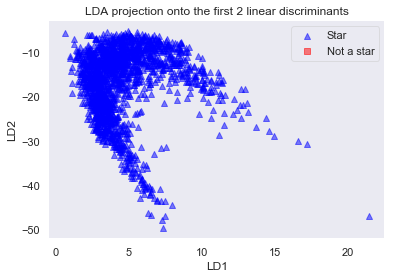

In [27]:
from matplotlib import pyplot as plt

def plot_step_lda():
    
    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,3),('^', 's'),('blue', 'red')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA projection onto the first 2 linear discriminants')
    
    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False)    
 
    plt.grid()
    plt.tight_layout
    plt.show()
    
plot_step_lda()

## PCA

Standardizing

In [28]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

Eigendecomposition - Computing Eigenvectors and Eigenvalues

In [29]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.0001  0.5472 -0.8739 -0.7388 -0.2989 -0.307   0.2343  0.144 ]
 [ 0.5472  1.0001 -0.5215 -0.5398  0.0069 -0.0476  0.0294  0.0277]
 [-0.8739 -0.5215  1.0001  0.9458  0.4144  0.4329 -0.3412 -0.2145]
 [-0.7388 -0.5398  0.9458  1.0001  0.4121  0.4152 -0.3289 -0.2048]
 [-0.2989  0.0069  0.4144  0.4121  1.0001  0.7966 -0.616  -0.3543]
 [-0.307  -0.0476  0.4329  0.4152  0.7966  1.0001 -0.8098 -0.5758]
 [ 0.2343  0.0294 -0.3412 -0.3289 -0.616  -0.8098  1.0001  0.9238]
 [ 0.144   0.0277 -0.2145 -0.2048 -0.3543 -0.5758  0.9238  1.0001]]


In [30]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.3597  0.3619  0.0133  0.2923  0.7443  0.0184  0.3146 -0.027 ]
 [ 0.2123  0.4302 -0.4364 -0.7568  0.019   0.0461 -0.0642 -0.0046]
 [-0.4161 -0.3181 -0.0917 -0.303   0.1462  0.0523  0.773  -0.0607]
 [-0.4015 -0.3058 -0.0835 -0.1779  0.6436 -0.0207 -0.5397  0.0285]
 [-0.3456  0.2479 -0.5704  0.3324 -0.0733 -0.6072  0.0263 -0.0921]
 [-0.3863  0.3172 -0.2342  0.2577 -0.0659  0.7517 -0.0611 -0.2362]
 [ 0.3702 -0.411  -0.2733  0.038   0.0034  0.0153 -0.0507 -0.7842]
 [ 0.2923 -0.3978 -0.5823  0.2    -0.0158  0.2459  0.0334  0.5617]]

Eigenvalues 
[4.1343 2.1447 0.8094 0.4575 0.2582 0.1599 0.0204 0.016 ]


Correlation matrix

In [31]:
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.3597  0.3619  0.0133  0.2923  0.7443  0.0184  0.3146 -0.027 ]
 [ 0.2123  0.4302 -0.4364 -0.7568  0.019   0.0461 -0.0642 -0.0046]
 [-0.4161 -0.3181 -0.0917 -0.303   0.1462  0.0523  0.773  -0.0607]
 [-0.4015 -0.3058 -0.0835 -0.1779  0.6436 -0.0207 -0.5397  0.0285]
 [-0.3456  0.2479 -0.5704  0.3324 -0.0733 -0.6072  0.0263 -0.0921]
 [-0.3863  0.3172 -0.2342  0.2577 -0.0659  0.7517 -0.0611 -0.2362]
 [ 0.3702 -0.411  -0.2733  0.038   0.0034  0.0153 -0.0507 -0.7842]
 [ 0.2923 -0.3978 -0.5823  0.2    -0.0158  0.2459  0.0334  0.5617]]

Eigenvalues 
[4.134  2.1446 0.8093 0.4574 0.2582 0.1599 0.0204 0.016 ]


Singular Vector Decomposition

In [32]:
u,s,v = np.linalg.svd(X_std.T)
print('Vectors U:\n', u)

Vectors U:
 [[-0.3597  0.3619 -0.0133 -0.2923  0.7443 -0.0184  0.3146 -0.027 ]
 [-0.2123  0.4302  0.4364  0.7568  0.019  -0.0461 -0.0642 -0.0046]
 [ 0.4161 -0.3181  0.0917  0.303   0.1462 -0.0523  0.773  -0.0607]
 [ 0.4015 -0.3058  0.0835  0.1779  0.6436  0.0207 -0.5397  0.0285]
 [ 0.3456  0.2479  0.5704 -0.3324 -0.0733  0.6072  0.0263 -0.0921]
 [ 0.3863  0.3172  0.2342 -0.2577 -0.0659 -0.7517 -0.0611 -0.2362]
 [-0.3702 -0.411   0.2733 -0.038   0.0034 -0.0153 -0.0507 -0.7842]
 [-0.2923 -0.3978  0.5823 -0.2    -0.0158 -0.2459  0.0334  0.5617]]


Selecting Principal Components

In [33]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
4.134046703618393
2.1446050976113074
0.8093489637378042
0.45742482463055434
0.2582269167815736
0.15987930338642187
0.02044193837379934
0.016026251860136887


Explained Variance

In [34]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

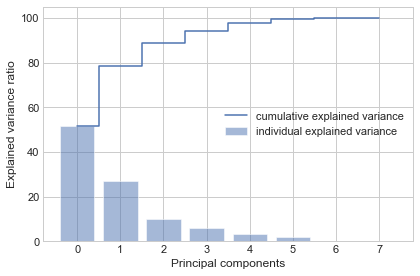

In [35]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(8), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(8), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

Projection Matrix

In [36]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(8,1), 
                      eig_pairs[1][1].reshape(8,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.3597  0.3619]
 [ 0.2123  0.4302]
 [-0.4161 -0.3181]
 [-0.4015 -0.3058]
 [-0.3456  0.2479]
 [-0.3863  0.3172]
 [ 0.3702 -0.411 ]
 [ 0.2923 -0.3978]]


In [37]:
Y = X_std.dot(matrix_w)

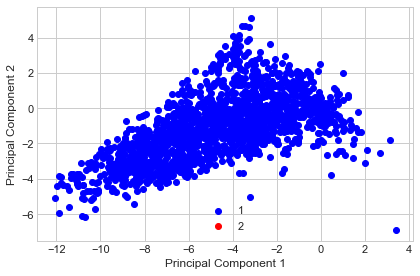

In [38]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip((1, 2,), 
                        ('blue', 'red')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()

#### PCA via sklearn

In [39]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)

Y_sklearn = sklearn_pca.fit_transform(X_std)

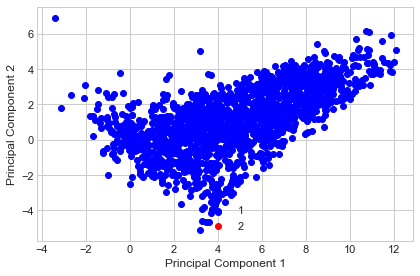

In [40]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip((1, 2,), 
                        ('blue', 'red',)):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

## QDA

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

accuracy_score : 0.9675977653631285

classification report :
              precision    recall  f1-score   support

          0      0.986     0.978     0.982      4884
          1      0.795     0.864     0.828       486

avg / total      0.969     0.968     0.968      5370

                      Model name  Accuracy    AUC  Precision
0  QuadraticDiscriminantAnalysis     0.968  0.968      0.795


Model name  Accuracy    AUC  Precision
0     LinearDiscriminantAnalysis     0.973  0.975      0.943
0  QuadraticDiscriminantAnalysis     0.968  0.968      0.795

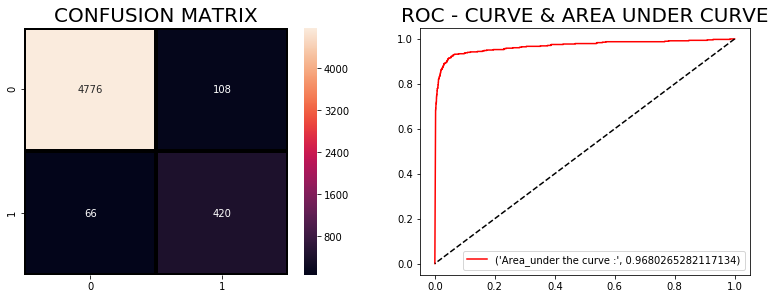

In [82]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
qda = QDA()  
df2=df2.append(model(qda,X_train, y_train, X_test, y_test,"none",df))
df2

## Naive Bayes

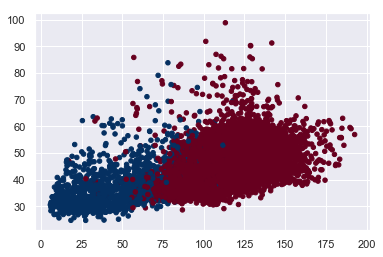

In [42]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='RdBu');

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
GaussianNB(priors=None)

accuracy_score : 0.9467411545623836

classification report :
              precision    recall  f1-score   support

          0      0.985     0.956     0.970      4884
          1      0.658     0.858     0.745       486

avg / total      0.956     0.947     0.950      5370

   Model name  Accuracy    AUC  Precision
0  GaussianNB     0.947  0.958      0.658


Model name  Accuracy    AUC  Precision
0     LinearDiscriminantAnalysis     0.973  0.975      0.943
0  QuadraticDiscriminantAnalysis     0.968  0.968      0.795
0                     GaussianNB     0.947  0.958      0.658

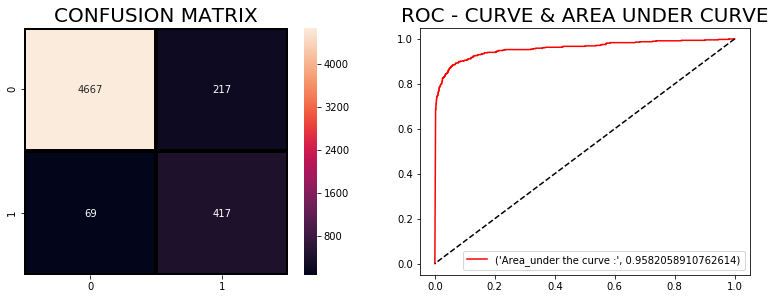

In [83]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()  

df2=df2.append(model(nb,X_train, y_train, X_test, y_test,"none",df))
df2

## KNN

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

accuracy_score : 0.9737430167597766

classification report :
              precision    recall  f1-score   support

          0      0.977     0.994     0.986      4884
          1      0.930     0.767     0.841       486

avg / total      0.973     0.974     0.973      5370

             Model name  Accuracy    AUC  Precision
0  KNeighborsClassifier     0.974  0.946       0.93


Model name  Accuracy    AUC  Precision
0     LinearDiscriminantAnalysis     0.973  0.975      0.943
0  QuadraticDiscriminantAnalysis     0.968  0.968      0.795
0                     GaussianNB     0.947  0.958      0.658
0           KNeighborsClassifier     0.974  0.946      0.930

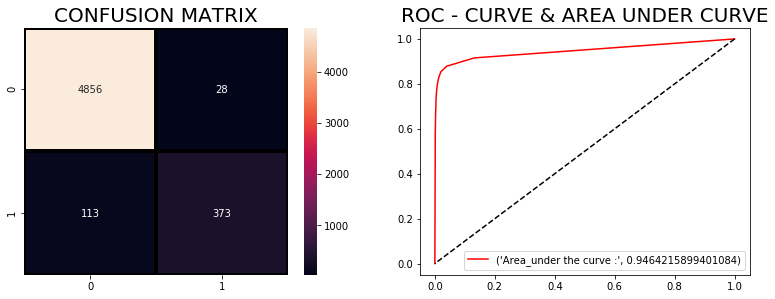

In [84]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors = 10) 

df2=df2.append(model(knn,X_train, y_train, X_test, y_test,"none",df))
df2

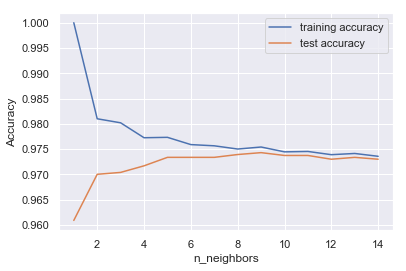

In [45]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 15)

for n_neighbors in neighbors_settings:
    # build the model
    clf = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## Decision Trees

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

accuracy_score : 0.9698324022346368

classification report :
              precision    recall  f1-score   support

          0      0.984     0.983     0.983      4884
          1      0.828     0.842     0.835       486

avg / total      0.970     0.970     0.970      5370

               Model name  Accuracy    AUC  Precision
0  DecisionTreeClassifier      0.97  0.912      0.828


Model name  Accuracy    AUC  Precision
0     LinearDiscriminantAnalysis     0.973  0.975      0.943
0  QuadraticDiscriminantAnalysis     0.968  0.968      0.795
0                     GaussianNB     0.947  0.958      0.658
0           KNeighborsClassifier     0.974  0.946      0.930
0         DecisionTreeClassifier     0.970  0.912      0.828

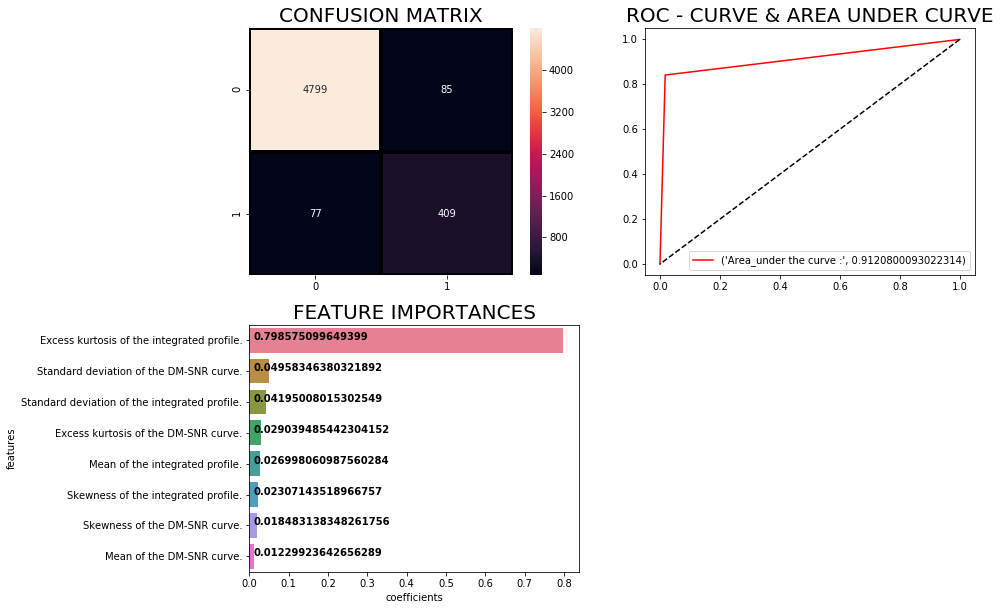

In [85]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()


df2=df2.append(model(dt,X_train, y_train, X_test, y_test,"feat",df))
df2

## SVM

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

accuracy_score : 0.978584729981378

classification report :
              precision    recall  f1-score   support

          0      0.981     0.996     0.988      4884
          1      0.949     0.807     0.872       486

avg / total      0.978     0.979     0.978      5370

  Model name  Accuracy    AUC  Precision
0        SVC     0.979  0.975      0.949


Model name  Accuracy    AUC  Precision
0     LinearDiscriminantAnalysis     0.973  0.975      0.943
0  QuadraticDiscriminantAnalysis     0.968  0.968      0.795
0                     GaussianNB     0.947  0.958      0.658
0           KNeighborsClassifier     0.974  0.946      0.930
0         DecisionTreeClassifier     0.970  0.912      0.828
0                            SVC     0.979  0.975      0.949

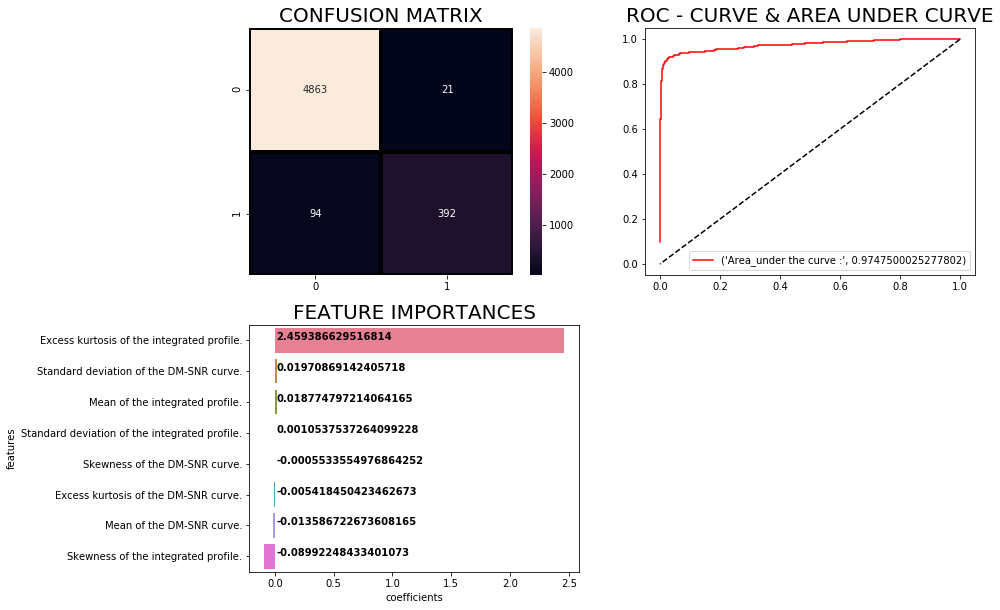

In [86]:
from sklearn.svm import SVC
svc = SVC(C=1, kernel='linear', probability=True)


df2=df2.append(model(svc,X_train, y_train, X_test, y_test,"coef",df))
df2

In [54]:
#from sklearn.model_selection import GridSearchCV

# Select the optimal C parameter by cross-validation
#tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
#svc = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
#svc.fit(X_train, y_train)
#print(clf.cv_results_)
#Print(clf.best_params_)

polynomial

In [316]:
#tuned_parameters = [{'C': [0.005, 0.01, 0.1, 1, 10, 100],
#                     'gamma': [0.1, 0.3,0.5, 1,2,3,4]}]
#clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
#clf.fit(X_train, y_train)
#clf.best_params_

{'C': 0.005, 'gamma': 0.1}

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
SVC(C=0.005, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

accuracy_score : 0.9094972067039107

classification report :
              precision    recall  f1-score   support

          0      0.909     1.000     0.953      4884
          1      0.000     0.000     0.000       486

avg / total      0.827     0.909     0.866      5370

  Model name  Accuracy    AUC  Precision
0        SVC     0.909  0.932        0.0


Model name  Accuracy    AUC  Precision
0     LinearDiscriminantAnalysis     0.973  0.975      0.943
0  QuadraticDiscriminantAnalysis     0.968  0.968      0.795
0                     GaussianNB     0.947  0.958      0.658
0           KNeighborsClassifier     0.974  0.946      0.930
0         DecisionTreeClassifier     0.970  0.912      0.828
0                            SVC     0.979  0.975      0.949
0                            SVC     0.909  0.932      0.000

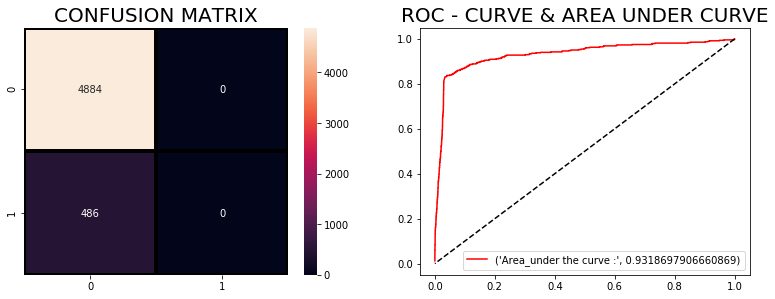

In [87]:
svc_p = SVC(C=0.005, kernel='rbf', gamma=0.1, probability=True)


df2=df2.append(model(svc_p,X_train, y_train, X_test, y_test,"none",df))
df2

## AdaBoost

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

accuracy_score : 0.9782122905027933

classification report :
              precision    recall  f1-score   support

          0      0.982     0.994     0.988      4884
          1      0.932     0.819     0.872       486

avg / total      0.978     0.978     0.978      5370

           Model name  Accuracy    AUC  Precision
0  AdaBoostClassifier     0.978  0.974      0.932


Model name  Accuracy    AUC  Precision
0     LinearDiscriminantAnalysis     0.973  0.975      0.943
0  QuadraticDiscriminantAnalysis     0.968  0.968      0.795
0                     GaussianNB     0.947  0.958      0.658
0           KNeighborsClassifier     0.974  0.946      0.930
0         DecisionTreeClassifier     0.970  0.912      0.828
0                            SVC     0.979  0.975      0.949
0                            SVC     0.909  0.932      0.000
0             AdaBoostClassifier     0.978  0.974      0.932

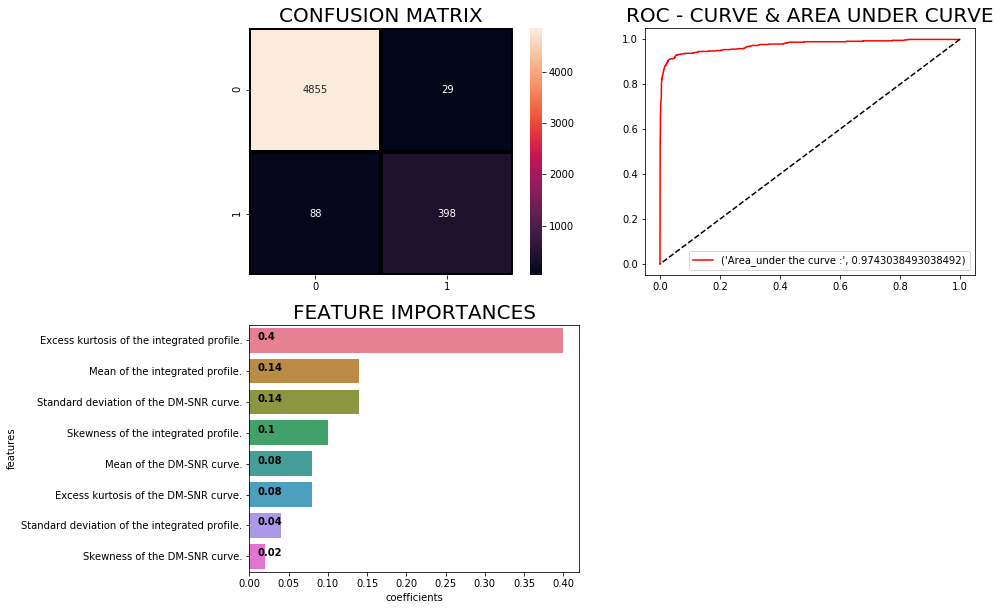

In [88]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

df2=df2.append(model(ada,X_train, y_train, X_test, y_test,"feat",df))
df2

## Gradient Boosting

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

accuracy_score : 0.9791433891992551

classification report :
              precision    recall  f1-score   support

          0      0.984     0.993     0.989      4884
          1      0.923     0.840     0.879       486

avg / total      0.979     0.979     0.979      5370

                   Model name  Accuracy    AUC  Precisio

Model name  Accuracy    AUC  Precision
0     LinearDiscriminantAnalysis     0.973  0.975      0.943
0  QuadraticDiscriminantAnalysis     0.968  0.968      0.795
0                     GaussianNB     0.947  0.958      0.658
0           KNeighborsClassifier     0.974  0.946      0.930
0         DecisionTreeClassifier     0.970  0.912      0.828
0                            SVC     0.979  0.975      0.949
0                            SVC     0.909  0.932      0.000
0             AdaBoostClassifier     0.978  0.974      0.932
0     GradientBoostingClassifier     0.979  0.975      0.923

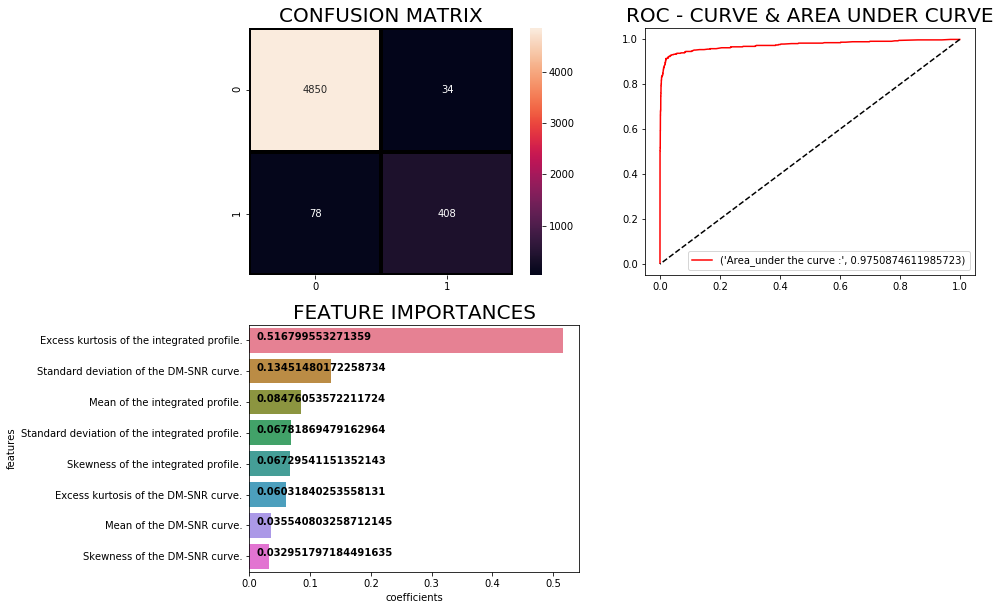

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

df2=df2.append(model(gbc,X_train, y_train, X_test, y_test,"feat",df))
df2

## Logistic regression

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

accuracy_score : 0.978584729981378

classification report :
              precision    recall  f1-score   support

          0      0.982     0.995     0.988      4884
          1      0.941     0.815     0.873       486

avg / total      0.978     0.979     0.978      5370

           Model name  Accuracy    AUC  Precision
0  LogisticRegression     0.979  0.975      0.941


Model name  Accuracy    AUC  Precision
0     LinearDiscriminantAnalysis     0.973  0.975      0.943
0  QuadraticDiscriminantAnalysis     0.968  0.968      0.795
0                     GaussianNB     0.947  0.958      0.658
0           KNeighborsClassifier     0.974  0.946      0.930
0         DecisionTreeClassifier     0.970  0.912      0.828
0                            SVC     0.979  0.975      0.949
0                            SVC     0.909  0.932      0.000
0             AdaBoostClassifier     0.978  0.974      0.932
0     GradientBoostingClassifier     0.979  0.975      0.923
0             LogisticRegression     0.979  0.975      0.941

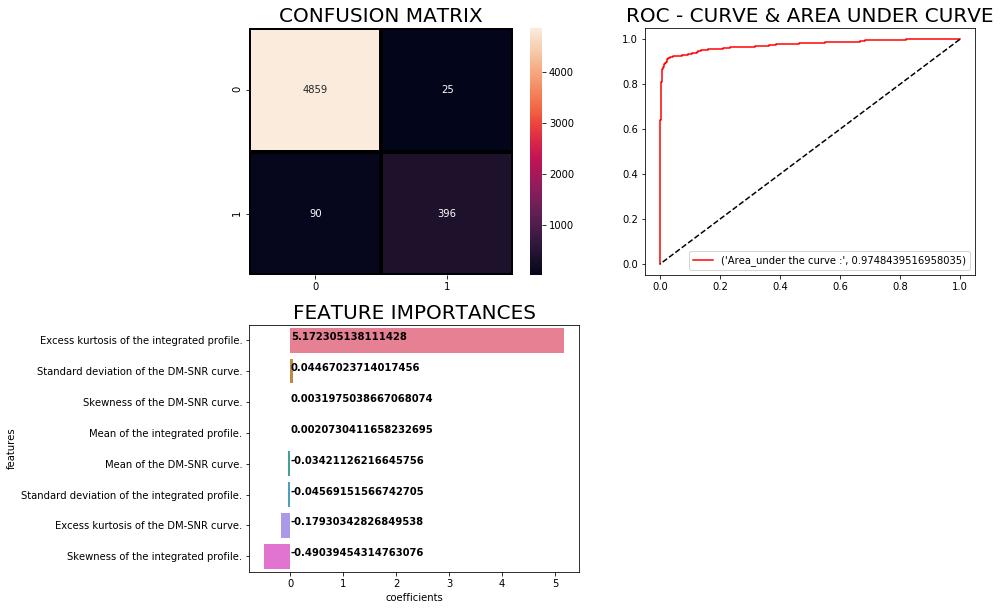

In [90]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

df2=df2.append(model(log,X_train, y_train, X_test, y_test,"coef",df))
df2

In [96]:

df2

Model name  Accuracy    AUC  Precision
0     LinearDiscriminantAnalysis     0.973  0.975      0.943
0  QuadraticDiscriminantAnalysis     0.968  0.968      0.795
0                     GaussianNB     0.947  0.958      0.658
0           KNeighborsClassifier     0.974  0.946      0.930
0         DecisionTreeClassifier     0.970  0.912      0.828
0                            SVC     0.979  0.975      0.949
0                            SVC     0.909  0.932      0.000
0             AdaBoostClassifier     0.978  0.974      0.932
0     GradientBoostingClassifier     0.979  0.975      0.923
0             LogisticRegression     0.979  0.975      0.941